In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv", index_col=0)
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## EDA

In [3]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

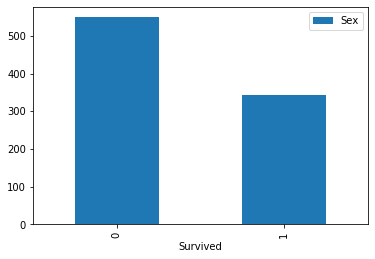

In [4]:
df[['Sex','Survived']].groupby(['Survived']).count().plot.bar()

In [5]:
df[['Pclass','Sex','Survived']].groupby(['Pclass','Sex','Survived']).size()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64

In [6]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## prepare train-test data and split

In [7]:
X = df[['Pclass', 'Sex', 'Age']]

In [8]:
y = df['Survived']

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split( X,y )

In [10]:
Xtrain.shape ,Xtest.shape

((668, 3), (223, 3))

## Feature engineering 

In [11]:
age_mean = Xtrain['Age'].mean()
age_mean

29.740557620817842

In [12]:
Xtrain['Age'] = Xtrain['Age'].fillna(age_mean)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
Xtrain['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
dummy_sex =pd.get_dummies(Xtrain['Sex'])
dummy_sex.head()

,female,male
PassengerId,,
561,0,1
333,0,1
598,0,1
507,1,0
366,0,1


In [15]:
Xtrain['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
dummy_class =pd.get_dummies(Xtrain['Pclass'])
dummy_class.head()

,1,2,3
PassengerId,,,
561,0,0,1
333,1,0,0
598,0,0,1
507,0,1,0
366,0,0,1


In [17]:
Xtrain = pd.concat([Xtrain,dummy_class,dummy_sex], axis=1)
Xtrain

,Pclass,Sex,Age,1,2,3,female,male
PassengerId,,,,,,,,
561,3,male,29.740558,0,0,1,0,1
333,1,male,38.000000,1,0,0,0,1
598,3,male,49.000000,0,0,1,0,1
507,2,female,33.000000,0,1,0,1,0
366,3,male,30.000000,0,0,1,0,1
...,...,...,...,...,...,...,...,...
434,3,male,17.000000,0,0,1,0,1
620,2,male,26.000000,0,1,0,0,1
614,3,male,29.740558,0,0,1,0,1


In [23]:
del Xtrain['Pclass']


KeyError: 'Pclass'

In [24]:
del Xtrain['Sex']

## Logistic Regression

In [25]:
m = LogisticRegression(random_state=10)


In [26]:
m.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
Xtrain

,Age,1,2,3,female,male
PassengerId,,,,,,
561,29.740558,0,0,1,0,1
333,38.000000,1,0,0,0,1
598,49.000000,0,0,1,0,1
507,33.000000,0,1,0,1,0
366,30.000000,0,0,1,0,1
...,...,...,...,...,...,...
434,17.000000,0,0,1,0,1
620,26.000000,0,1,0,0,1
614,29.740558,0,0,1,0,1


## train set

In [32]:
ypred_train = m.predict(Xtrain)

In [33]:
m.score(Xtrain, ytrain)

0.8053892215568862

In [36]:
accuracy = accuracy_score(ytrain, ypred_train)
accuracy

0.8053892215568862

In [38]:
confusion_matrix(m,Xtrain,ytrain)

TypeError: Expected sequence or array-like, got <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [ ]:
precision =precision_score(ytrain, ypred_train)

In [ ]:
recall= recall_score(ytrain,ypred_train)

In [ ]:
f1score = f1_score(ytrain,ypred_train)

## test set

In [39]:
ypred_test = m.predict(Xtest)

ValueError: could not convert string to float: 'male'

upsss ! go back and do again!